# 2018년 우리나라의 지역별 인구 증가율과 고령 인구비율 사이의 경향성을 선형회귀로 예측

In [5]:
import numpy as np
import matplotlib.pyplot  as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24,
-0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29,
16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a :  -0.41696972205601757 b :  15.668665264060529


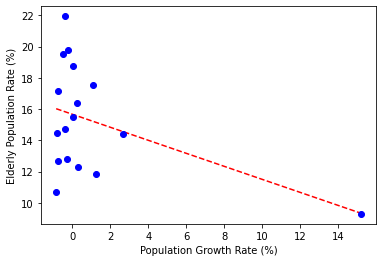

In [6]:
#X와 Y의 평균을 구하는 과정
x_bar=sum(X)/len(X)
y_bar=sum(Y)/len(Y)

#a와 b를 구하는 과정 -> 최소제곱법
a = sum([(y-y_bar)*(x-x_bar) for y,x in list(zip(Y,X))])
a/=sum([(x-x_bar)**2 for x in X])
b = y_bar - a*x_bar
print("a : ",a,"b : ",b)

# 그래프를 그리기 위한 회귀선의 x, y 데이터 추출 과정
line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x+b

# 붉은색 실선으로 회귀선 그리기
plt.plot(line_x, line_y, 'r--')

# 기존 데이터를 점으로 표시
plt.plot(X,Y,'bo')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

초기 a값:  0.48462775
초기 b값:  0.6391204
99 a :  0.14926279 b :  7.003661 loss: 79.71949
199 a :  -0.14039183 b :  11.432849 loss: 26.058275
299 a :  -0.30528703 b :  13.958202 loss: 11.95609
399 a :  -0.3802457 b :  15.10622 loss: 9.505618
499 a :  -0.40718475 b :  15.518803 loss: 9.229627
599 a :  -0.41486734 b :  15.636466 loss: 9.20951
699 a :  -0.41660875 b :  15.6631365 loss: 9.208563
799 a :  -0.41692108 b :  15.667919 loss: 9.208537
899 a :  -0.41696468 b :  15.668587 loss: 9.208534
999 a :  -0.41696864 b :  15.66865 loss: 9.208535


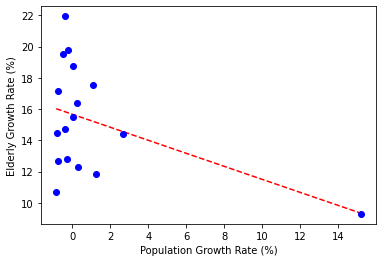

In [8]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24,
-0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29,
16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#하나의 변수를 만들 때 나온다.
a=tf.Variable(random.random())
b=tf.Variable(random.random())
print("초기 a값: ",a.numpy())
print("초기 b값: ",b.numpy()) #편향값

#잔차의 제곱의 평균을 구하는 과정
def compute_loss():
  y_pred = a*X+b
  loss = tf.reduce_mean((Y-y_pred)**2)
  return loss

# 옵티마이저 단계
optimizer=tf.keras.optimizers.Adam(lr=0.07)

# 학습 단계
for i in range(1000):
  # 잔차의 제곱의 평균을 최소화 시켜주기 위한 과정
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i%100 == 99:
    print(i, "a : ", a.numpy(), "b : ",b.numpy(), "loss:", compute_loss().numpy())

line_x=np.arange(min(X),max(X),0.01)
line_y=a*line_x+b

plt.plot(line_x,line_y,'r--')

plt.plot(X,Y,'bo')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Growth Rate (%)")
plt.show()

데이터 경향성을 좀 더 파악해보자!

초기 a값:  0.66003644
초기 b값:  0.16126521
초기 c값:  0.81699365
초기 c값:  0.12759617
99 a :  0.034220573 b :  -0.4572311 c: 0.1969927 d: 1.7528849 loss: 204.89151
199 a :  0.030054528 b :  -0.44991672 c: 0.20181337 d: 4.9968925 loss: 122.37997
299 a :  0.028487898 b :  -0.44014817 c: 0.20884675 d: 8.060871 loss: 67.78839
399 a :  0.027184159 b :  -0.4319357 c: 0.21435797 d: 10.6054735 loss: 35.938984
499 a :  0.026203599 b :  -0.4258156 c: 0.21792637 d: 12.541355 loss: 19.9076
599 a :  0.02553339 b :  -0.4217614 c: 0.21960793 d: 13.905276 loss: 12.8668585
699 a :  0.025121532 b :  -0.4194503 c: 0.21971105 d: 14.798429 loss: 10.161191
799 a :  0.024902789 b :  -0.41845647 c: 0.21863128 d: 15.342906 loss: 9.250867
899 a :  0.024815993 b :  -0.41837597 c: 0.21674544 d: 15.652194 loss: 8.982582
999 a :  0.024812566 b :  -0.4188872 c: 0.21435955 d: 15.816027 loss: 8.913048


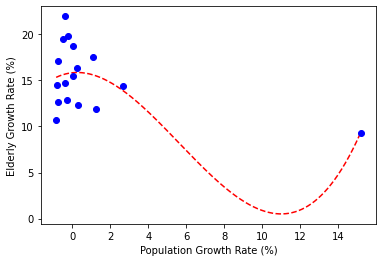

In [9]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24,
-0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29,
16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#하나의 변수를 만들 때 나온다.
a=tf.Variable(random.random())
b=tf.Variable(random.random())
c=tf.Variable(random.random())
d=tf.Variable(random.random())
print("초기 a값: ",a.numpy())
print("초기 b값: ",b.numpy()) #편향값
print("초기 c값: ",c.numpy())
print("초기 c값: ",d.numpy())
#잔차의 제곱의 평균을 구하는 과정
def compute_loss():
  y_pred = a*X*X*X+b*X*X+c*X+d
  loss = tf.reduce_mean((Y-y_pred)**2)
  return loss

# 옵티마이저 단계
optimizer=tf.keras.optimizers.Adam(lr=0.07)

# 학습 단계
for i in range(1000):
  # 잔차ㅢ 제곱의 평균을 최소화 시켜주기 위한 과정
  optimizer.minimize(compute_loss, var_list=[a,b,c,d])

  if i%100 == 99:
    print(i, "a : ", a.numpy(), "b : ",b.numpy(), "c:",c.numpy(),"d:",d.numpy(), "loss:", compute_loss().numpy())

line_x=np.arange(min(X),max(X),0.01)
line_y=a*line_x*line_x*line_x+b*line_x*line_x+c*line_x+d

plt.plot(line_x,line_y,'r--')

plt.plot(X,Y,'bo')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Growth Rate (%)")
plt.show()

적절한 회귀식이라고 말하기는 어렵다. -> 최적의 회귀식을 찾도록 노력해야한다.

앞에서 AND, OR, XOR 연산에서 사용한 네트워크처럼 사용

In [10]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24,
-0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29,
16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#tanh -> -1~1사이
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=6, activation='tanh',input_shape=(1,)),
                             tf.keras.layers.Dense(units=1)
                             ])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X,Y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 384ms/step - loss: 244.6797
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 108.9416
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 10.5868
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 9.1954
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 8.6540
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 8.6171
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 8.6082
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 8.5389
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 8.4648
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 8.4276


In [12]:
model.predict(X)
#데이터가 적고, 모델 견고 X
#거의 15부근으로 값을 출력

array([[16.167397 ],
       [15.203353 ],
       [15.0073   ],
       [16.238052 ],
       [15.205605 ],
       [ 9.12589  ],
       [16.198479 ],
       [16.11736  ],
       [15.8462305],
       [15.22938  ],
       [15.9843445],
       [15.011194 ],
       [15.93294  ],
       [16.091183 ],
       [16.237125 ],
       [15.25505  ],
       [13.955223 ]], dtype=float32)

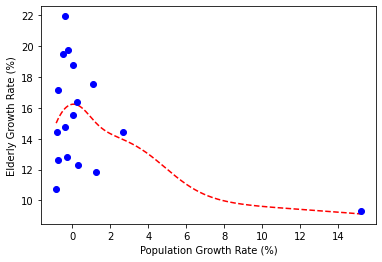

In [13]:
#2차 함수와 비슷한 곡선이 나옴
line_x=np.arange(min(X),max(X),0.01)
line_y=model.predict(line_x)

plt.plot(line_x,line_y,'r--')

plt.plot(X,Y,'bo')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Growth Rate (%)")
plt.show()